In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
from ta.momentum import rsi
import pyodbc
import quantstats as qs
from Rolling_Functions_Final import * 

## Setting Up

In [20]:
def draw_performance(list_of_codes_dict, window_list, title_name, requirement):
        """
        :param list_of_codes_dict: {'513100': 0, '512890': 1333, '159967': 1451}
        :param window_list: [21]
        :param title_name: str
        :param requirement: 1. 'Equal', 2. 'Unequal'

        :return: plot
        """
        list_of_codes = list(list_of_codes_dict.keys())
        Daily_Return = Rolling.get_data(list_of_codes)
        data_table = Rolling.single_window_table(Daily_Return, [21], len(list_of_codes))
        if data_table.iloc[-1, :].isnull().any():
            data_table = data_table.iloc[:-1,:]

        data_plot = pd.DataFrame()
        
        plot_dict = {}


        if requirement == 'Equal':
             data_table = data_table.iloc[max(list_of_codes_dict.values()):,:]
             for i in list_of_codes_dict:
                list_of_codes_dict[str(i)] = 0
             data_table['signal_return_21'] = data_table['signal_return_21']*(100/data_table.loc[:,'signal_return_21'][0])
                  

        for key, value in list_of_codes_dict.items():
            data_plot[f'etf_{str(key)}_return'] = data_table[f'etf_{str(key)}']*(100/data_table.loc[:,f'etf_{str(key)}'][value])
            plot_dict[f'Sharpe_{str(key)}'] = Test.get_Sharpe(data_plot, f'etf_{str(key)}_return')

        plot_dict[f'Sharpe_window_{str(window_list[0])}'] = Test.get_Sharpe(data_table, f'signal_return_{window_list[0]}')

        _ = plt.figure(figsize=(25, 12))
        plt.xlabel('Time') 
        plt.ylabel('Return')
        for item in data_plot:
            _ = plt.plot(np.array(data_plot[f'{str(item)}'].index),data_plot[f'{str(item)}'].values)
        _ = plt.plot(np.array(data_table['signal_return_21'].index),data_table['signal_return_21'].values)

        legend_list = []
        for key, value in plot_dict.items():
             legend_list.append(f'etf_{key[7:]}_return: {round(value, 3)}')
        _ = plt.legend(legend_list)
        plt.title(f"{title_name}", fontsize=20)
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

## Unequal Period

Here at starting from the longest period


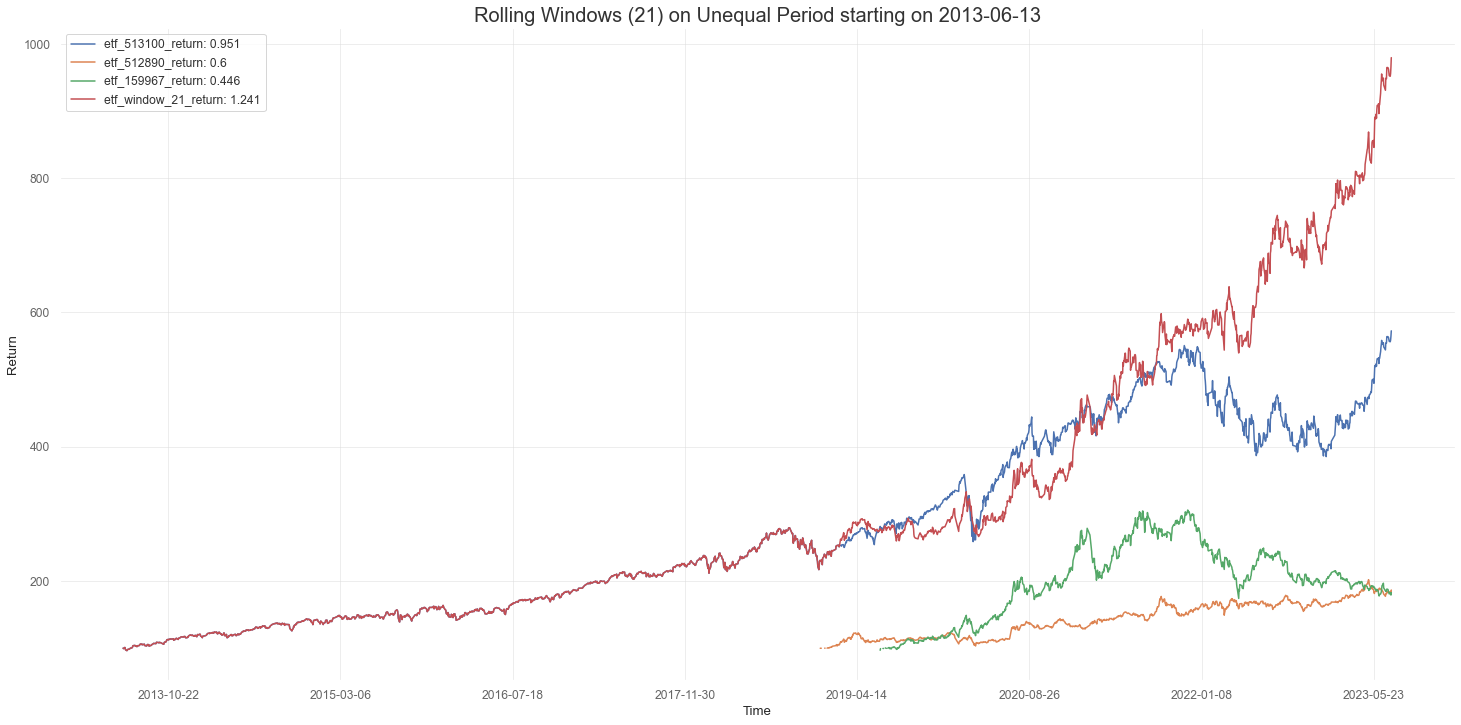

In [21]:
list_of_codes_dict = {'513100': 0, '512890': 1333, '159967': 1451}
window_list = [21]
title_name = "Rolling Windows (21) on Unequal Period starting on 2013-06-13"
requirement = 'Unequal'


draw_performance(list_of_codes_dict, window_list, title_name, requirement)

##  Equal period

Here at starting from the longest period


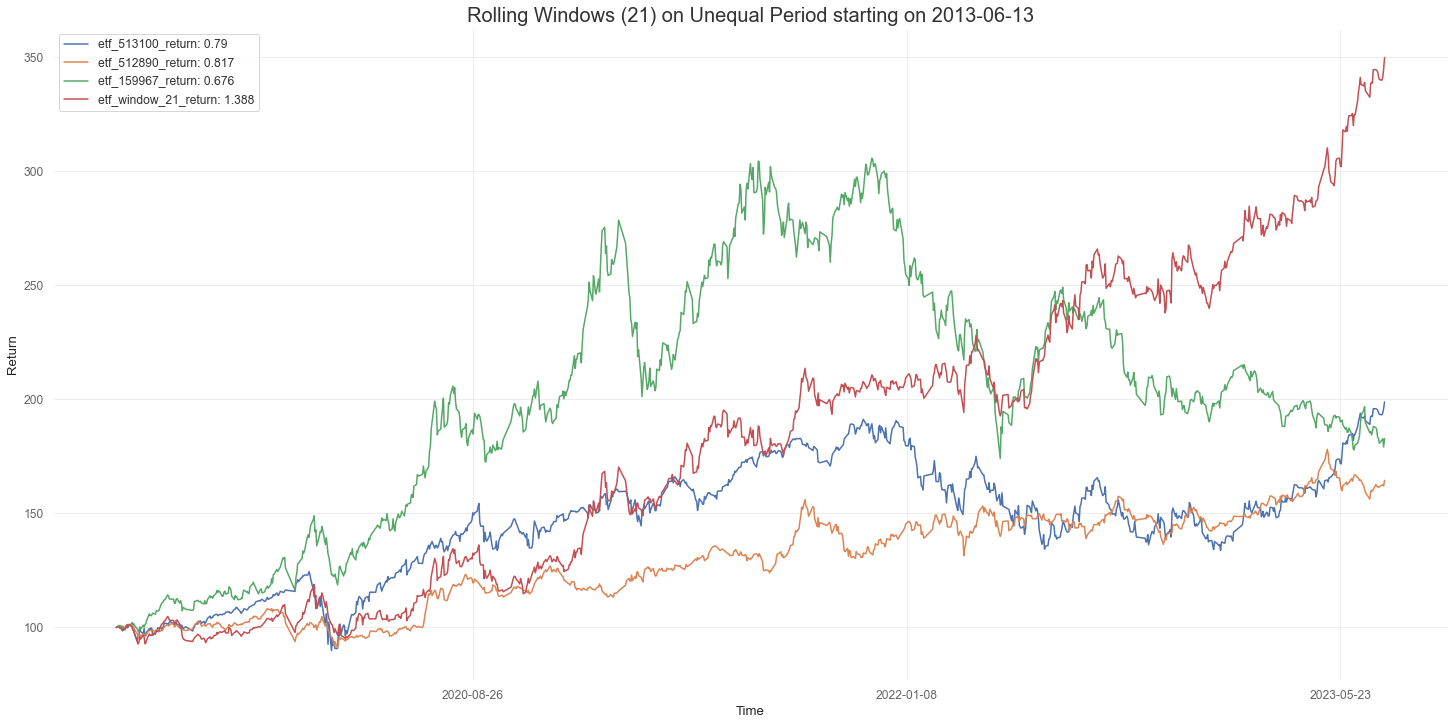

In [22]:
list_of_codes_dict = {'513100': 0, '512890': 1333, '159967': 1451}
window_list = [21]
title_name = "Rolling Windows (21) on Unequal Period starting on 2013-06-13"
requirement = 'Equal'


draw_performance(list_of_codes_dict, window_list, title_name, requirement)